# Follow data를 이용한 시계열 예측분석


# 시작하기 : 분석용 데이터 업로드 확인

분석대상 데이터 파일(CSV)을 업로드합니다.
업로드가 모두 완료 되었는지 확인할수 있습니다.

In [1]:
from google.colab import files
import pandas as pd
import io
import datetime, string

uploaded = files.upload()
fnCnt = 0
meargeDf = pd.DataFrame()

for fn in uploaded.keys():
  print("=" * 100)
  df = pd.DataFrame()
    

  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

In [ ]:
def chk_fileupload(filepath) :

  f = open(filepath, 'r')

  i = 0
  txt = ""
  while True:
      line = f.readline()
      if not line: break
      i = i + 1
      txt = line
      # print(i,":",line)
  f.close()

  print(i,":",txt)

chk_fileupload("/content/sample_data/2018_4.csv")

849879 : "충북 충주시","도시대기","633123","칠금동","2018123124","0.00500","0.60000","0.00200","0.04200","78.00000","43.00000","충북 충주시 칠금동 874번지(칠금동 주민센터 옥상)(칠금 중랑로 37)","20190801 12:10:56"



# 1. 환경설정      

데이터 분석 예측모델은 ARIMA 모델을 활용합니다.
데이터 분석을 위해 필요한 여러 패키지를 설정합니다.

**import pandas as pd**

판다스는 엑셀관련 패키지로 엑셀파일이나 CSV 파일을 읽어 메모리에 엑셀과 같은 형태의 그리드성 데이터 구조를 생성하고 관리합니다.

**import numpy as np**

넘피는 여러 통계성 수학모델을 제공합니다.

**from matplotlib import pyplot as plt**

매쓰라이브러리를 통해 시각화(차트)를 위한 puplot을 plt라는 이름으로 불러옵니다.

**from statsmodels.tsa.arima_model import ARIMA**

예측분석 모델을 읽어옵니다.

#statsmodels

**statsmodels 패키지**

statsmodels 패키지는

***검정 및 추정(test and estimation)* *회귀분석(regression analysis)* *시계열분석(time-series analysis)***
등의 다양한 통계분석 기능을 제공하는 파이썬 패키지다. 특히 회귀분석의 경우 R 스타일의 모형 기술을 가능하게 하는 patsy 패키지를 포함하고 있어 기존에 R에서만 가능했던 회귀분석과 시계열분석 방법론을 그대로 파이썬에서 이용할 수 있게 되었다.

statsmodels 패키지의 개발 목표 중 하나는 기존에 R을 사용하여 통계 분석 및 시계열 분석을 하던 사용자가 파이썬에서 동일한 분석을 할 수 있도록 하는 것이다. 따라서 R에서 제공하던 명령어 뿐만 아니라 데이터셋도 동일하게 제공하기 위해 Rdatasets이라는 프로젝트를 통해 R에서 사용하던 1000개 이상의 표준 데이터셋을 사용할 수 있도록 지원한다. 자세한 사항은 다음 프로젝트 홈페이지에서 확인할 수 있다.


#2. 데이터 추출하기

판다스의 CSV 읽기 기능을 이용하여 2018년 4분기 데이터를 읽어와 측정소코드가 238361인 자료를 필터링 한다.

#3. 시계열 분석용 데이터 추출하기

미세먼지10 농도 컬럼을 추출하여 명칭 "target"으로 데이터 프레임에 삽입한다.

In [ ]:
#1. config
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from statsmodels.tsa.arima_model import ARIMA


#2. 데이터 추출 하기
air_pollution_raw = pd.read_csv('/content/sample_data/2018_4.csv')
air_pollution_raw.info()
yangsan_air_pollution = air_pollution_raw[air_pollution_raw['측정소코드'] == 238361]


print("="*100)
print("information :: 측정소 코드 238361")
yangsan_air_pollution 


#3. 시계열 분석용 데이터 추출 하기
print("="*100)
print("information :: 미세먼지10농도(㎍/㎥)")
yangsan_pm10 = pd.DataFrame({'target':yangsan_air_pollution['미세먼지10농도(㎍/㎥)']}).reset_index(drop=True)
yangsan_pm10.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 849878 entries, 0 to 849877
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   지역명            849878 non-null  object 
 1   측정망명           849878 non-null  object 
 2   측정소코드          849878 non-null  int64  
 3   측정소명           849878 non-null  object 
 4   측정시점           849878 non-null  int64  
 5   아황산가스농도(ppm)   788541 non-null  float64
 6   일산화탄소농도(ppm)   786349 non-null  float64
 7   오존농도(ppm)      793482 non-null  float64
 8   이산화질소농도(ppm)   793510 non-null  float64
 9   미세먼지10농도(㎍/㎥)  786583 non-null  float64
 10  미세먼지25농도(㎍/㎥)  735320 non-null  float64
 11  주소             849878 non-null  object 
 12  최종수정일시         849878 non-null  object 
dtypes: float64(6), int64(2), object(5)
memory usage: 84.3+ MB
information :: 측정소 코드 238361
information :: 미세먼지10농도(㎍/㎥)


,target
0,24.0
1,17.0
2,19.0
3,18.0
4,21.0


#시계열 데이터 분석



information :: #3. 시계열 분석용 데이터 추출 하기
information :: #2. 데이터 추출 하기(측정소 필터링)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2208 entries, 114 to 849602
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   지역명            2208 non-null   object 
 1   측정망명           2208 non-null   object 
 2   측정소코드          2208 non-null   int64  
 3   측정소명           2208 non-null   object 
 4   측정시점           2208 non-null   int64  
 5   아황산가스농도(ppm)   2168 non-null   float64
 6   일산화탄소농도(ppm)   2167 non-null   float64
 7   오존농도(ppm)      2167 non-null   float64
 8   이산화질소농도(ppm)   2167 non-null   float64
 9   미세먼지10농도(㎍/㎥)  2145 non-null   float64
 10  미세먼지25농도(㎍/㎥)  2098 non-null   float64
 11  주소             2208 non-null   object 
 12  최종수정일시         2208 non-null   object 
dtypes: float64(6), int64(2), object(5)
memory usage: 241.5+ KB
information ::5. 전처리 데이터 시각화 


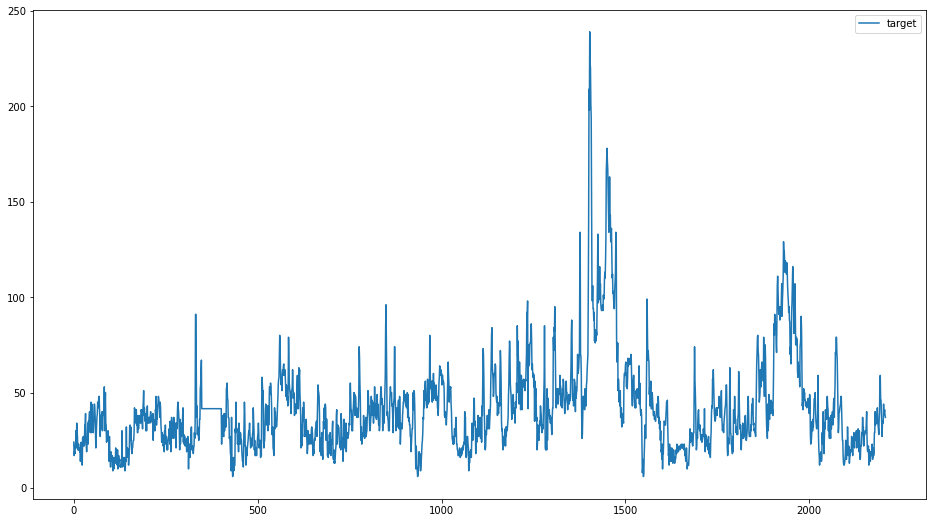

information ::6. ARIMA 시계열 분석 수행 피팅 결과 요약 
information ::  0 0 0
information ::  0 0 1
information ::  0 0 2
information ::  0 0 3
information ::  0 0 4
information ::  0 0 5
information ::  0 1 0
information ::  0 1 1
information ::  0 1 2
information ::  0 1 3
information ::  0 1 4
information ::  0 1 5
information ::  0 2 0
information ::  0 2 1
information ::  0 2 2
information ::  0 2 3
information ::  0 2 4
information ::  0 2 5
information ::  1 0 0
information ::  1 0 1
information ::  1 0 2
information ::  1 0 3
information ::  1 0 4
information ::  1 0 5
information ::  1 1 0
information ::  1 1 1
information ::  1 1 2
information ::  1 1 3
information ::  1 1 4
information ::  1 1 5
information ::  1 2 0
information ::  1 2 1
information ::  1 2 2
information ::  1 2 3
information ::  1 2 4
information ::  1 2 5
information ::  2 0 0
information ::  2 0 1
information ::  2 0 2
information ::  2 0 3
information ::  2 0 4
information ::  2 0 5
information ::  2 1 0
information

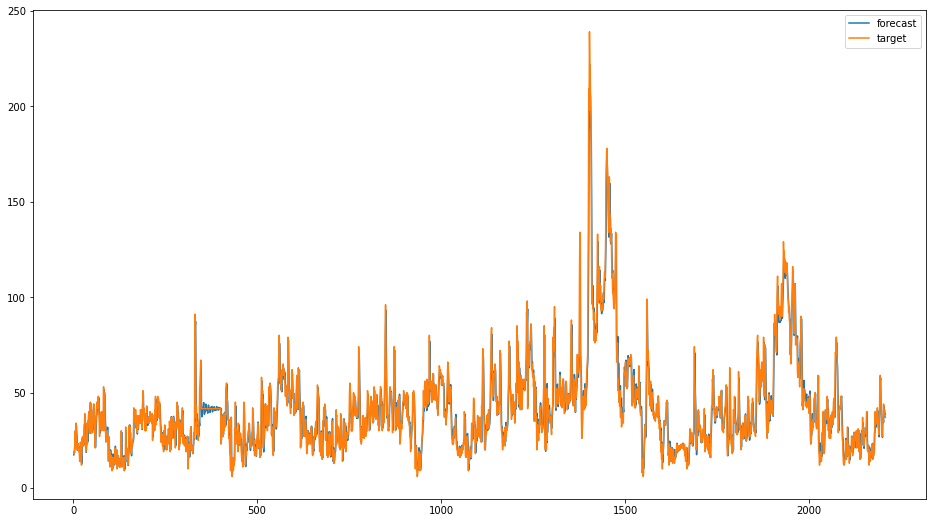

information :: 2019_1.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 912684 entries, 0 to 912683
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   측정일시                  912684 non-null  object 
 1   측정소코드                 912684 non-null  int64  
 2   측정소명                  912684 non-null  object 
 3   아황산가스 농도(ppm)         874437 non-null  float64
 4   일산화탄소 농도(ppm)         878364 non-null  float64
 5   오존 농도(ppm)            882354 non-null  float64
 6   이산화질소 농도(ppm)         890850 non-null  float64
 7   PM10 농도(㎍/㎥)          890093 non-null  float64
 8   PM25 농도(㎍/㎥)          847782 non-null  float64
 9   통합대기환경수치정보            841368 non-null  float64
 10  통합대기환경지수정보            841368 non-null  float64
 11  아황산가스지수정보             876064 non-null  float64
 12  일산화탄소지수정보             878355 non-null  float64
 13  오존지수정보                882346 non-null  float64
 14  이산화질소지수정보             8908

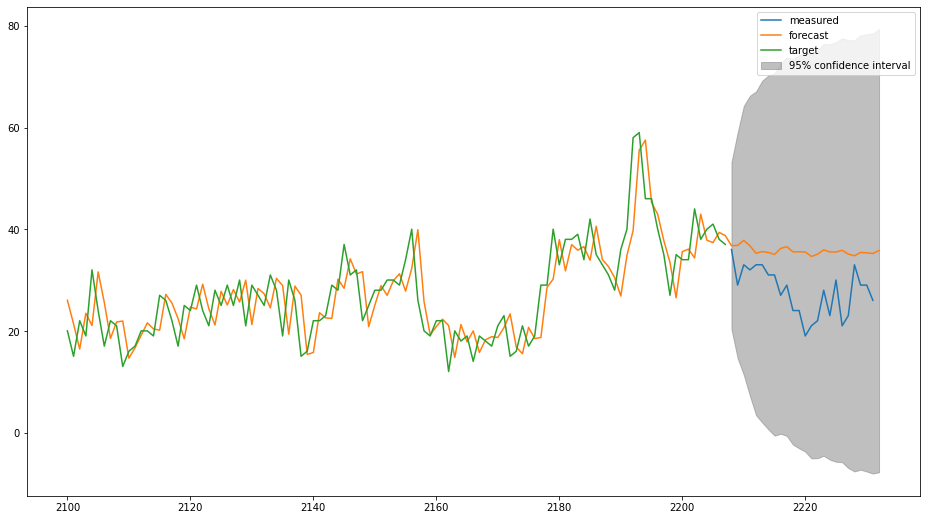

In [ ]:
#1. config
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from statsmodels.tsa.arima_model import ARIMA

#2. 데이터 추출 하기(측정소 필터링 및 시계열 분석용 데이터)
def prepro_target(filepath, code) :
    pd.read_csv(filepath)
    yangsan_air_pollution = air_pollution_raw[air_pollution_raw['측정소코드'] == code]

    print("="*100)
    print("information :: #2. 데이터 추출 하기(측정소 필터링)")
    yangsan_air_pollution.info()
    return pd.DataFrame({'target':yangsan_air_pollution['미세먼지10농도(㎍/㎥)']}).reset_index(drop=True)
    

#3. 시계열 분석용 데이터 추출 하기
print("="*100)
print("information :: #3. 시계열 분석용 데이터 추출 하기")
yangsan_pm10 = prepro_target('/content/sample_data/2018_4.csv', 238361)
yangsan_pm10.head()

#4. 결측값 확인 및 처리
yangsan_pm10.fillna(yangsan_pm10['target'].mean(), inplace=True)
yangsan_pm10[yangsan_pm10.isna()['target'] == True]

# yangsan_pm10.to_csv('/content/sample_data/2018_4_new.csv')

#5. 전처리 데이터 확인

print("="*100)
print("information ::5. 전처리 데이터 시각화 ")
fig, ax = plt.subplots(figsize=(16,9))
ax = yangsan_pm10.plot(ax=ax)
plt.show()



#6. ARIMA 시계열 분석 수행
model=ARIMA(yangsan_pm10, order=(1,1,1))
#모델 피팅(상수항 없이 피팅)
model_fitted=model.fit(trend='nc')
#피팅 결과 요약
print("="*100)
print("information ::6. ARIMA 시계열 분석 수행 피팅 결과 요약 ")
model_fitted.summary(alpha=0.5)


print("="*100)
print("information ::7. ARIMA 모델 자동 최적화 ")
#7. ARIMA 모델 자동 최적화
#임의의 높은 AIC값을 설정, 아래 숫자는 임의의 큰 값
optimal_aic = 2147483647 

#AR의 차수는 0~5 중에 결정
for p in range(6):
  print("information :: ",p)
  for d in range(3):
    for q in range(6):
      try:              
        model = ARIMA(yangsan_pm10, order=(p,d,q)).fit(trend='nc', disp=0)
        if optimal_aic > model.aic:
          optimal_model = model
          optimal_aic = model.aic
      except:
        pass


print("="*100)
print("information ::피팅 결과")
optimal_model.summary()


#8. 예측결과 시각화
print("="*100)
print("information ::8. 예측결과 시각화")
fig, ax = plt.subplots(figsize=(16,9))
fig = optimal_model.plot_predict(ax=ax)
plt.show()




#9. 예측결과 검증데이터 추가

air_pollution_19q1_raw = pd.read_csv('/content/sample_data/2019_1.csv', error_bad_lines=False, engine='python',na_values = ['?', '-', 'N/A', 'NA', 'nan', 'NaN', '-nan', '-NaN', 'null'])
print("="*100)
print("information :: 2019_1.csv")
air_pollution_19q1_raw.info()


yangsan_air_pollution_19q1_head = air_pollution_19q1_raw[air_pollution_19q1_raw['측정소코드'] == 238361].head(24)
yangsan_pm10_19q1_head = pd.DataFrame({'measured':pd.to_numeric(yangsan_air_pollution_19q1_head['PM10 농도(㎍/㎥)'])}).set_index(np.array(range(2208,2232)))
print("="*100)
print("information :: PM10 HEAD")
yangsan_pm10_19q1_head


#10. 모델 검증 확인

print("="*100)
print("information :: 모델 검증 확인")

fig, ax = plt.subplots(figsize=(16,9))
fig = optimal_model.plot_predict(start=2100, end=2232, ax=yangsan_pm10_19q1_head.plot(ax=ax))
plt.show()


#9. 예측결과 검증데이터 추가

예측 결과 확인검증을 위해 2019년 1분기 측정자료를 읽어와 검증 기준에 해당하는  데이터를 전처리합니다.

동일 측정소인 데이터 분석의 편의성을 위해 측정소 코드 238361 인 데이터를 필터링하고 컬럼명 "PM10 농도(㎍/㎥)" 을 측정확인을 위해 "measured"로 변경하여 데이터 프레임을 생성합니다.


In [ ]:
#1. config
import pandas as pd


#9. 예측결과 검증데이터 추가

# air_pollution_19q1_raw = pd.read_csv('/content/sample_data/2019_1_unicode.csv',error_bad_lines=False, engine='python')
air_pollution_19q1_raw = pd.read_csv('/content/sample_data/2019_1.csv',error_bad_lines=False, engine='python')
# air_pollution_19q1_raw = pd.read_csv('/content/sample_data/2019_1.csv', error_bad_lines=False, engine='python',na_values = ['?', '-', 'N/A', 'NA', 'nan', 'NaN', '-nan', '-NaN', 'null'])

print("="*100)
print("information :: 2019_1.csv")
air_pollution_19q1_raw.info()

yangsan_air_pollution_19q1_head = air_pollution_19q1_raw[air_pollution_19q1_raw['측정소코드'] == 238361].head(24)
yangsan_pm10_19q1_head = pd.DataFrame({'measured':pd.to_numeric(yangsan_air_pollution_19q1_head['PM10 농도(㎍/㎥)'])}).set_index(np.array(range(2208,2232)))

print("="*100)
print("information :: PM10 HEAD")
yangsan_pm10_19q1_head


# 새 섹션

In [ ]:
#1. config
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from statsmodels.tsa.arima_model import ARIMA

#2. 데이터 추출 하기(측정소 필터링 및 시계열 분석용 데이터)
def prepro_target(filepath, code) :
    pd.read_csv(filepath)
    yangsan_air_pollution = air_pollution_raw[air_pollution_raw['측정소코드'] == code]

    print("="*100)
    print("information :: #2. 데이터 추출 하기(측정소 필터링)")
    yangsan_air_pollution.info()
    pd.DataFrame()
    return pd.DataFrame({'target':yangsan_air_pollution['미세먼지10농도(㎍/㎥)'],'date':yangsan_air_pollution['측정시점']}).reset_index(drop=True)
    

#3. 시계열 분석용 데이터 추출 하기
print("="*100)
print("information :: #3. 시계열 분석용 데이터 추출 하기")
yangsan_pm10 = prepro_target('/content/sample_data/2018_4.csv', 238361)
yangsan_pm10.head()

#4. 결측값 확인 및 처리
yangsan_pm10.fillna(yangsan_pm10['target'].mean(), inplace=True)
yangsan_pm10[yangsan_pm10.isna()['target'] == True]

yangsan_pm10.to_csv('/content/sample_data/2018_4_new.csv')

information :: #3. 시계열 분석용 데이터 추출 하기
information :: #2. 데이터 추출 하기(측정소 필터링)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2208 entries, 114 to 849602
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   지역명            2208 non-null   object 
 1   측정망명           2208 non-null   object 
 2   측정소코드          2208 non-null   int64  
 3   측정소명           2208 non-null   object 
 4   측정시점           2208 non-null   int64  
 5   아황산가스농도(ppm)   2168 non-null   float64
 6   일산화탄소농도(ppm)   2167 non-null   float64
 7   오존농도(ppm)      2167 non-null   float64
 8   이산화질소농도(ppm)   2167 non-null   float64
 9   미세먼지10농도(㎍/㎥)  2145 non-null   float64
 10  미세먼지25농도(㎍/㎥)  2098 non-null   float64
 11  주소             2208 non-null   object 
 12  최종수정일시         2208 non-null   object 
dtypes: float64(6), int64(2), object(5)
memory usage: 241.5+ KB


In [ ]:
#1. config
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from statsmodels.tsa.arima_model import ARIMA

#2. 데이터 추출 하기(측정소 필터링 및 시계열 분석용 데이터)
def prepro_target(filepath, code) :
    pd.read_csv(filepath)
    yangsan_air_pollution = air_pollution_raw[air_pollution_raw['측정소코드'] == code]

    print("="*100)
    print("information :: #2. 데이터 추출 하기(측정소 필터링)")
    # yangsan_air_pollution.info()
    return pd.DataFrame({'target':yangsan_air_pollution['미세먼지10농도(㎍/㎥)']}).reset_index(drop=True)
    

#3. 시계열 분석용 데이터 추출 하기
# print("="*100)
# print("information :: #3. 시계열 분석용 데이터 추출 하기")
yangsan_pm10 = prepro_target('/content/sample_data/2018_4.csv', 238361)
yangsan_pm10.head()

#4. 결측값 확인 및 처리
yangsan_pm10.fillna(yangsan_pm10['target'].mean(), inplace=True)
yangsan_pm10[yangsan_pm10.isna()['target'] == True]





#6. ARIMA 시계열 분석 수행
model=ARIMA(yangsan_pm10, order=(1,1,1))
#모델 피팅(상수항 없이 피팅)
model_fitted=model.fit(trend='nc')
#피팅 결과 요약
print("="*100)
print("information ::6. ARIMA 시계열 분석 수행 피팅 결과 요약 ")
model_fitted.summary()



information :: #2. 데이터 추출 하기(측정소 필터링)
information ::6. ARIMA 시계열 분석 수행 피팅 결과 요약 


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:               D.target   No. Observations:                 2207
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -7842.138
Method:                       css-mle   S.D. of innovations              8.451
Date:                Mon, 13 Jul 2020   AIC                          15690.277
Time:                        08:10:30   BIC                          15707.375
Sample:                             1   HQIC                         15696.524
                                                                              
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
ar.L1.D.target     0.8695      0.019     45.075      0.000       0.832       0.907
ma.L1.D.target    -0.9637      0.011    -89.397      0.000      -0.985      -0.943
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.1501           +0.0000j            1.1501            0.0000
MA.1            1.0377           +0.0000j            1.0377            0.0000
-----------------------------------------------------------------------------
"""